In [1]:
%matplotlib inline

/Users/BohaoHuang/anaconda2/envs/bhplayground/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


I've crawled all matches played by challenger tier in NA of SEASON2016 by using 'crawlTierMatches.py'. The S7 season has not started yet, let's just play on this data first.

## Load Data

In [2]:
import pickle
import os

In [3]:
path = os.path.join(os.path.dirname('getMatchList.ipynb'), 'data')
with open(os.path.join(path, 'league_match_history_2016_na.pickle'), 'rb') as f:
    match_ids = pickle.load(f)
    matches = pickle.load(f)
print(len(matches))

174135


In [4]:
import pandas as pd

In [5]:
matches_stats = pd.DataFrame.from_dict(matches)
matches_stats.head()

,champion,lane,matchId,platformId,queue,region,role,season,timestamp
0,48,TOP,2385745688,NA1,TEAM_BUILDER_RANKED_SOLO,NA,SOLO,PRESEASON2017,1482992249383
1,114,TOP,2385731629,NA1,TEAM_BUILDER_RANKED_SOLO,NA,SOLO,PRESEASON2017,1482990373176
2,111,TOP,2385667248,NA1,TEAM_BUILDER_RANKED_SOLO,NA,SOLO,PRESEASON2017,1482987974687
3,114,TOP,2385670291,NA1,TEAM_BUILDER_RANKED_SOLO,NA,SOLO,PRESEASON2017,1482985730020
4,126,TOP,2385615641,NA1,TEAM_BUILDER_RANKED_SOLO,NA,SOLO,PRESEASON2017,1482984018229


## What Lane Do People Play Most?

First we need to seperate duo_carry and duo_support.

In [6]:
matches_stats.loc[matches_stats['role'] == 'DUO_CARRY', 'lane'] = 'BOT_ADC'
matches_stats.loc[matches_stats['role'] == 'DUO_SUPPORT', 'lane'] = 'BOT_SUP'
# drop those BOTTOM that are neither DUO_CARRY nor DUO_SUPPORT
matches_stats = matches_stats[matches_stats['lane'] != 'BOTTOM']
matches_stats.head()

,champion,lane,matchId,platformId,queue,region,role,season,timestamp
0,48,TOP,2385745688,NA1,TEAM_BUILDER_RANKED_SOLO,NA,SOLO,PRESEASON2017,1482992249383
1,114,TOP,2385731629,NA1,TEAM_BUILDER_RANKED_SOLO,NA,SOLO,PRESEASON2017,1482990373176
2,111,TOP,2385667248,NA1,TEAM_BUILDER_RANKED_SOLO,NA,SOLO,PRESEASON2017,1482987974687
3,114,TOP,2385670291,NA1,TEAM_BUILDER_RANKED_SOLO,NA,SOLO,PRESEASON2017,1482985730020
4,126,TOP,2385615641,NA1,TEAM_BUILDER_RANKED_SOLO,NA,SOLO,PRESEASON2017,1482984018229


In [7]:
lane_stats = matches_stats.groupby(['lane', 'queue']).size()
lane_stats = lane_stats.unstack()
lane_stats

queue,RANKED_FLEX_SR,RANKED_PREMADE_3x3,RANKED_SOLO_5x5,RANKED_TEAM_3x3,RANKED_TEAM_5x5,TEAM_BUILDER_DRAFT_RANKED_5x5,TEAM_BUILDER_RANKED_SOLO
lane,,,,,,,
BOT_ADC,1465.0,30.0,618.0,76.0,238.0,21533.0,4844.0
BOT_SUP,1091.0,14.0,375.0,38.0,265.0,20483.0,3772.0
JUNGLE,1867.0,196.0,612.0,448.0,465.0,28606.0,6863.0
MID,1909.0,205.0,868.0,430.0,552.0,32056.0,5993.0
TOP,1455.0,NaN,703.0,1.0,453.0,26947.0,6142.0


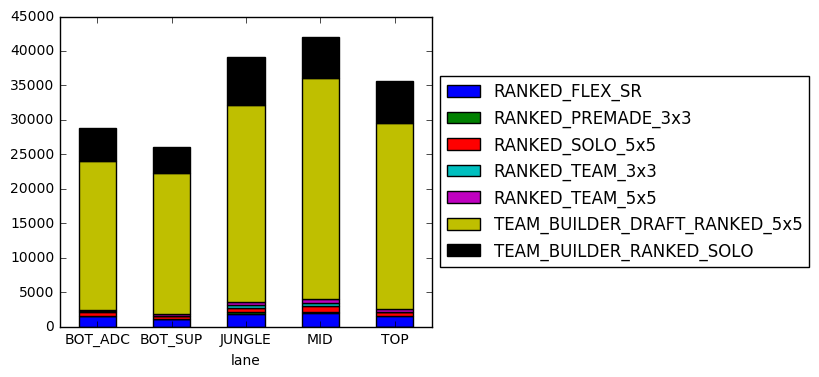

In [8]:
ax = lane_stats.plot.bar(stacked=True, legend=False);
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
pass

## What Champion Do People Play Most?

In [9]:
champ_stats = matches_stats.groupby(['lane', 'champion']).size()
champ_stats = champ_stats.unstack()
champ_stats.head()

champion,1,2,3,4,5,6,7,8,9,10,...,254,266,267,268,412,420,421,427,429,432
lane,,,,,,,,,,,,,,,,,,,,,
BOT_ADC,2.0,1.0,1.0,26.0,NaN,88.0,34.0,6.0,1.0,3.0,...,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,1056.0,NaN
BOT_SUP,43.0,8.0,5.0,7.0,4.0,1.0,31.0,NaN,32.0,2.0,...,8.0,1.0,1102.0,2.0,3268.0,5.0,22.0,22.0,1.0,2794.0
JUNGLE,5.0,1027.0,3.0,209.0,98.0,2.0,72.0,11.0,229.0,40.0,...,683.0,16.0,6.0,19.0,67.0,12.0,2511.0,291.0,14.0,48.0
MID,113.0,13.0,82.0,2081.0,4.0,40.0,3567.0,480.0,1.0,112.0,...,4.0,5.0,2.0,1317.0,2.0,20.0,17.0,4.0,4.0,6.0
TOP,10.0,209.0,33.0,5.0,37.0,44.0,55.0,220.0,2.0,332.0,...,4.0,46.0,3.0,18.0,3.0,552.0,17.0,3.0,7.0,3.0


In [10]:
from lolcrawler_util import get_champion_name
import matplotlib.pyplot as plt
import numpy as np

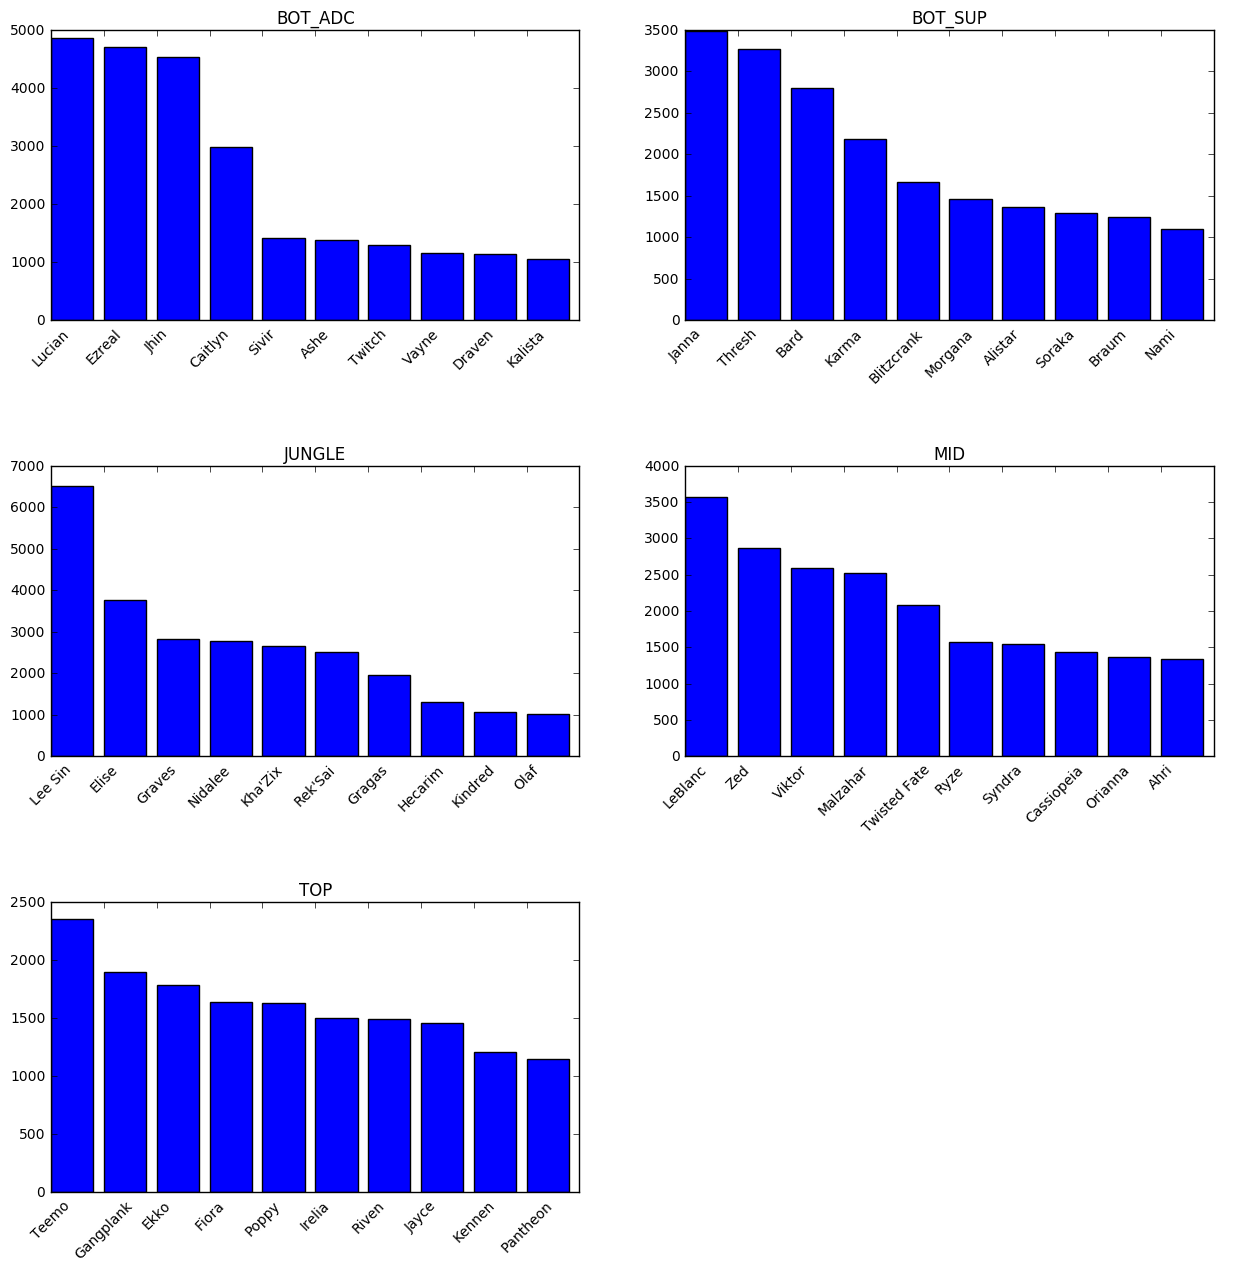

In [11]:
f, axarr = plt.subplots(3, 2, figsize=(15,15))
plt_cnt = 0
for lane, row in champ_stats.iterrows():
    sorted_row = row.sort_values(ascending=False)
    # print(sorted_row[:5].values)
    axarr[plt_cnt/2, plt_cnt%2].bar(np.arange(10), sorted_row[:10].values)
    axarr[plt_cnt/2, plt_cnt%2].title.set_text(lane)
    champion_name = []
    for c_id in sorted_row[:10].index.values:
        champion_name.append(get_champion_name(c_id))
    axarr[plt_cnt/2, plt_cnt%2].xaxis.set_ticks(np.arange(10))
    axarr[plt_cnt/2, plt_cnt%2].set_xticklabels(champion_name, rotation=45)
    plt_cnt += 1
f.subplots_adjust(hspace=0.5)
axarr[-1, -1].axis('off')
plt.show()